# 단순무향그래프(Simple Undirected Graph)

## networkx 구현

In [2]:
import networkx as nx

G = nx.Graph()  # 무향그래프
V = {"서울", "부산", "인천", "대구"}  # 문자열, 클래스, 다른 networkx 그래프와 같이 해시가능한 객체
E = [
    ("서울", "부산"),
    ("서울", "인천"),
    ("서울", "대구"),
    ("부산", "대구")
]
G.add_nodes_from(V)
G.add_edges_from(E)

print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['부산', '서울', '대구', '인천']
E = [('부산', '서울'), ('부산', '대구'), ('서울', '인천'), ('서울', '대구')]


## 그래프 위수, 크기, 각 노드의 차수와 근방노드

In [8]:
print(f"그래프 위수: {G.number_of_nodes()}")
print(f"그래프 크기: {G.number_of_edges()}")
print(f"노드 차수: { {v: G.degree(v) for v in G.nodes} }")
print(f"노드 근방: { {v: list(G.neighbors(v)) for v in G.nodes} }")

그래프 위수: 4
그래프 크기: 4
노드 차수: {'부산': 2, '서울': 3, '대구': 2, '인천': 1}
노드 근방: {'부산': ['서울', '대구'], '서울': ['부산', '인천', '대구'], '대구': ['서울', '부산'], '인천': ['서울']}


## 근방그래프

In [9]:
neighborhood_graph_busan = nx.ego_graph(G, "부산")

print(f"노드: {neighborhood_graph_busan.nodes}")
print(f"간선: {neighborhood_graph_busan.edges}")

노드: ['부산', '서울', '대구']
간선: [('부산', '서울'), ('부산', '대구'), ('서울', '대구')]


## 새로운 노드, 간선 추가

In [10]:
new_nodes = {"대전", "광주"}
new_edges = [
    ("대전", "광주"),
    ("대전", "부산"),
    ("대전", "서울"),
    ("대전", "대구"),
    ("광주", "서울"),
    ("광주", "인천")
]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)

print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['부산', '서울', '대구', '인천', '대전', '광주']
E = [('부산', '서울'), ('부산', '대구'), ('부산', '대전'), ('서울', '인천'), ('서울', '대구'), ('서울', '대전'), ('서울', '광주'), ('대구', '대전'), ('인천', '광주'), ('대전', '광주')]


## 노드 삭제
- 해당 노드에 연결된 변도 자동 삭제

In [13]:
remove_nodes = {"대전", "광주"}
G.remove_nodes_from(remove_nodes)  # 또는 G.remove_node("대전")

print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['부산', '서울', '대구', '인천']
E = [('부산', '대구'), ('서울', '인천')]


## 간선 삭제

In [14]:
remove_edges = [
    ("부산", "서울"),
    ("서울", "대구")
]
G.remove_edges_from(remove_edges)  # 또는 G.remove_edge("부산", "서울")

print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['부산', '서울', '대구', '인천']
E = [('부산', '대구'), ('서울', '인천')]


# 그래프 종류

## 유향그래프(Directed Graph)

In [15]:
G = nx.DiGraph()  # 유향그래프
V = {"서울", "부산", "인천", "대구"}
E = [
    ("부산", "서울"),
    ("인천", "서울"),
    ("대구", "서울"),
    ("부산", "인천"),
    ("대구", "부산"),
    ("대구", "인천")
]
G.add_nodes_from(V)
G.add_edges_from(E)

print(f"입력차수: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"출력차수: { {v: G.out_degree(v) for v in G.nodes} }")

입력차수: {'부산': 1, '서울': 3, '대구': 0, '인천': 2}
출력차수: {'부산': 2, '서울': 0, '대구': 3, '인천': 1}


## 다중그래프(Multigraph)

In [25]:
directed_multi_graph = nx.MultiDiGraph()  # 유향다중그래프
undirected_multi_graph = nx.MultiGraph()  # 무향다중그래프

V = {"서울", "부산", "인천", "대구"}
E = [
    ("부산", "서울"),
    ("부산", "서울"),
    ("인천", "서울"),
    ("대구", "서울"),
    ("대구", "서울"),
    ("부산", "인천"),
    ("대구", "부산"),
    ("대구", "인천")
]
directed_multi_graph.add_nodes_from(V)
undirected_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)
undirected_multi_graph.add_edges_from(E)

[0, 1, 0, 0, 1, 0, 0, 0]

## 가중그래프(Weighted Graph)

In [17]:
G = nx.DiGraph()
V = {"서울", "부산", "인천", "대구"}
E = [
    ("부산", "서울", 13),
    ("인천", "서울", 7),
    ("대구", "서울", 10),
    ("부산", "인천", 17),
    ("대구", "부산", 5),
    ("대구", "인천", 15)
]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

# 이분그래프(Bipartite Graph)

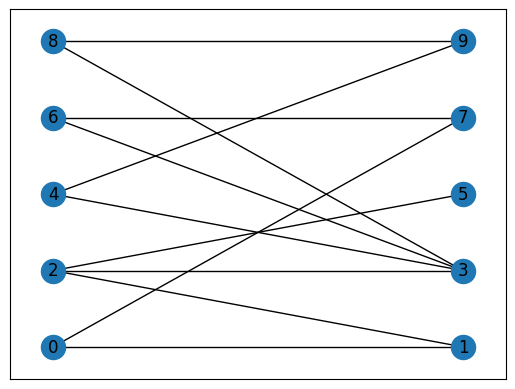

In [19]:
import pandas as pd
import numpy as np

n_nodes = 10
n_edges = 12

bottom_nodes = [ith for ith in range(n_nodes) if ith%2==0]  # [0, 2, 4, 6, 8]
top_nodes = [ith for ith in range(n_nodes) if ith%2==1]  # [1, 3, 5, 7, 9]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),
    np.random.choice(top_nodes, n_edges)
)
edges = pd.DataFrame([{"source": a, "target": b} for a, b in iter_edges])

B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

from networkx.drawing.layout import bipartite_layout  # 그래프 그리기

pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

# 인접행렬(Adjacency Matrix)

## 무향그래프

In [22]:
G = nx.Graph()  # 무향그래프
V = {"서울", "부산", "인천", "대구"}  # 문자열, 클래스, 다른 networkx 그래프와 같이 해시가능한 객체
E = [
    ("서울", "부산"),
    ("서울", "인천"),
    ("서울", "대구"),
    ("부산", "대구")
]
G.add_nodes_from(V)
G.add_edges_from(E)

print("Pandas DataFrame:\n", nx.to_pandas_adjacency(G))  # Pandas DataFrame 인접행렬
print("Numpy Array:\n", nx.to_numpy_array(G))  # Numpy Array 인접행렬

Pandas DataFrame:
      부산   서울   대구   인천
부산  0.0  1.0  1.0  0.0
서울  1.0  0.0  1.0  1.0
대구  1.0  1.0  0.0  0.0
인천  0.0  1.0  0.0  0.0
Numpy Array:
 [[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]


## 유향그래프

In [23]:
G = nx.DiGraph()  # 유향그래프
V = {"서울", "부산", "인천", "대구"}
E = [
    ("부산", "서울"),
    ("인천", "서울"),
    ("대구", "서울"),
    ("부산", "인천"),
    ("대구", "부산"),
    ("대구", "인천")
]
G.add_nodes_from(V)
G.add_edges_from(E)

print("Pandas DataFrame:\n", nx.to_pandas_adjacency(G))  # Pandas DataFrame 인접행렬
print("Numpy Array:\n", nx.to_numpy_array(G))  # Numpy Array 인접행렬

Pandas DataFrame:
      부산   서울   대구   인천
부산  0.0  1.0  0.0  1.0
서울  0.0  0.0  0.0  0.0
대구  1.0  1.0  0.0  1.0
인천  0.0  1.0  0.0  0.0
Numpy Array:
 [[0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]]


## 다중그래프

In [26]:
G = nx.MultiDiGraph()  # 유향다중그래프
V = {"서울", "부산", "인천", "대구"}
E = [
    ("부산", "서울"),
    ("부산", "서울"),
    ("인천", "서울"),
    ("대구", "서울"),
    ("대구", "서울"),
    ("부산", "인천"),
    ("대구", "부산"),
    ("대구", "인천")
]
G.add_nodes_from(V)
G.add_edges_from(E)

print("Pandas DataFrame:\n", nx.to_pandas_adjacency(G))  # Pandas DataFrame 인접행렬
print("Numpy Array:\n", nx.to_numpy_array(G))  # Numpy Array 인접행렬

Pandas DataFrame:
      부산   서울   대구   인천
부산  0.0  2.0  0.0  1.0
서울  0.0  0.0  0.0  0.0
대구  1.0  2.0  0.0  1.0
인천  0.0  1.0  0.0  0.0
Numpy Array:
 [[0. 2. 0. 1.]
 [0. 0. 0. 0.]
 [1. 2. 0. 1.]
 [0. 1. 0. 0.]]


## 가중그래프

In [27]:
G = nx.DiGraph()
V = {"서울", "부산", "인천", "대구"}
E = [
    ("부산", "서울", 13),
    ("인천", "서울", 7),
    ("대구", "서울", 10),
    ("부산", "인천", 17),
    ("대구", "부산", 5),
    ("대구", "인천", 15)
]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

print("Pandas DataFrame:\n", nx.to_pandas_adjacency(G))  # Pandas DataFrame 인접행렬
print("Numpy Array:\n", nx.to_numpy_array(G))  # Numpy Array 인접행렬

Pandas DataFrame:
      부산    서울   대구    인천
부산  0.0  13.0  0.0  17.0
서울  0.0   0.0  0.0   0.0
대구  5.0  10.0  0.0  15.0
인천  0.0   7.0  0.0   0.0
Numpy Array:
 [[ 0. 13.  0. 17.]
 [ 0.  0.  0.  0.]
 [ 5. 10.  0. 15.]
 [ 0.  7.  0.  0.]]


# 간선 리스트(Edge List)

In [28]:
G = nx.DiGraph()
V = {"서울", "부산", "인천", "대구"}
E = [
    ("부산", "서울", 13),
    ("인천", "서울", 7),
    ("대구", "서울", 10),
    ("부산", "인천", 17),
    ("대구", "부산", 5),
    ("대구", "인천", 15)
]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

print(nx.to_pandas_edgelist(G))

  source target  weight
0     부산     서울      13
1     부산     인천      17
2     대구     서울      10
3     대구     부산       5
4     대구     인천      15
5     인천     서울       7


# 그래프 그리기

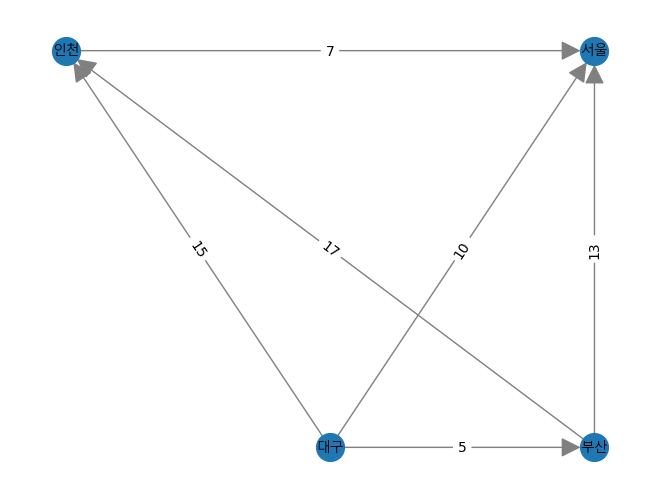

In [5]:
import networkx as nx


def draw_graph(graph, nodes_position: dict, weight):  # nodes_position: {노드 이름: 노드의 위치 좌표(직교좌표계의 2개의 값을 갖는 배열)}
    nx.draw(graph, nodes_position,
            with_labels=True, font_family="Malgun Gothic", font_size=10,  # 각 노드에 이름을 표시
            node_size=400,  # 노드의 크기
            edge_color="grey",  # 간선의 색상
            arrowsize=30)  # 간선의 화살표 크기(유향그래프인 경우)
    if weight:
        edge_labels = nx.get_edge_attributes(graph, "weight")
        nx.draw_networkx_edge_labels(graph, nodes_position, edge_labels=edge_labels)


G = nx.DiGraph()
V = {"서울", "부산", "인천", "대구"}
E = [
    ("부산", "서울", 13),
    ("인천", "서울", 7),
    ("대구", "서울", 10),
    ("부산", "인천", 17),
    ("대구", "부산", 5),
    ("대구", "인천", 15)
]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

nodes_position = {
    "서울": [1, 1],
    "부산": [1, 0],
    "인천": [0, 1],
    "대구": [0.5, 0]
}
draw_graph(G, nodes_position, True)

## 노드 레이아웃 종류

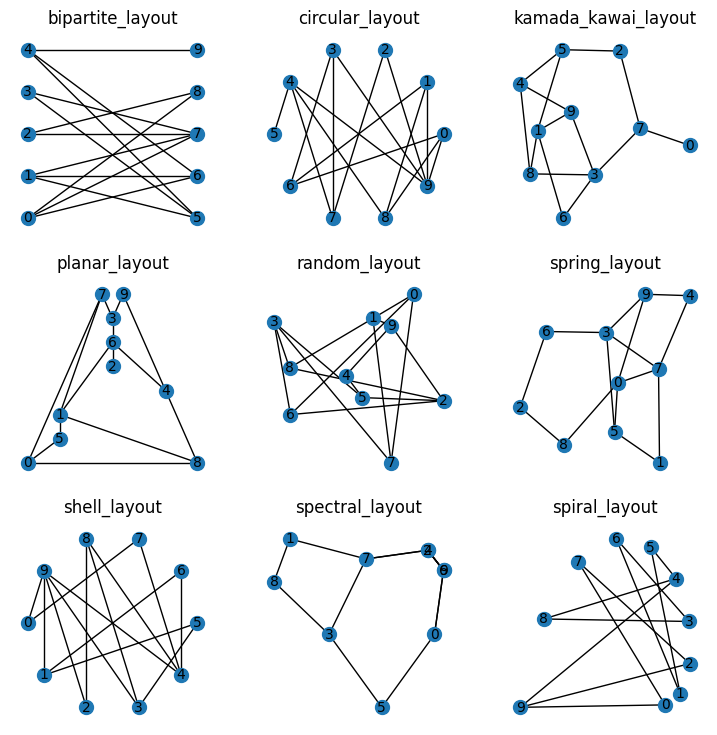

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.layout import bipartite_layout, circular_layout, kamada_kawai_layout, planar_layout, random_layout, spring_layout, shell_layout, spectral_layout, spiral_layout


n_nodes = 10
n_edges = 20
nodes = np.arange(n_nodes)  # [0, ..., 9]

fig, subs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
for sub, layout in zip(subs.flatten(),
                       [bipartite_layout, circular_layout, kamada_kawai_layout, planar_layout, random_layout, spring_layout, shell_layout, spectral_layout, spiral_layout]):
    iter_edges = zip(
        np.random.choice(nodes[:5], n_edges),
        np.random.choice(nodes[5:], n_edges)
    )
    edges = pd.DataFrame([{"source": a, "target": b} for a, b in iter_edges])
    
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from([tuple(x) for x in edges.values])
    
    if layout.__name__=="bipartite_layout":
        pos = layout(G, nodes=nodes[:5])
    else:
        pos = layout(G)
    nx.draw(G, pos=pos, ax=sub, with_labels=True, font_size=10, node_size=100)
    sub.set_title(layout.__name__)

---